In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from google.colab import auth
import gspread
from google.auth import default

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

worksheet = gc.open('DLExp1').sheet1
data = worksheet.get_all_values()


In [2]:
df = pd.DataFrame(data[1:], columns=data[0])
df = df.astype({'Input':'float'})
df = df.astype({'Output':'float'})
df.head()

X = df[['Input']].values
y = df[['Output']].values
X


array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.],
       [24.],
       [25.],
       [26.],
       [27.],
       [28.],
       [29.],
       [30.],
       [31.],
       [32.],
       [33.],
       [34.],
       [35.],
       [36.],
       [37.],
       [38.],
       [39.],
       [40.],
       [41.],
       [42.],
       [43.],
       [44.],
       [45.],
       [46.],
       [47.],
       [48.],
       [49.],
       [50.]])

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)
Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)
X_train1

array([[0.40425532],
       [0.59574468],
       [0.9787234 ],
       [0.44680851],
       [0.87234043],
       [0.89361702],
       [0.82978723],
       [0.12765957],
       [0.95744681],
       [1.        ],
       [0.72340426],
       [0.85106383],
       [0.08510638],
       [0.17021277],
       [0.63829787],
       [0.29787234],
       [0.42553191],
       [0.19148936],
       [0.21276596],
       [0.61702128],
       [0.23404255],
       [0.65957447],
       [0.70212766],
       [0.25531915],
       [0.36170213],
       [0.76595745],
       [0.0212766 ],
       [0.14893617],
       [0.34042553],
       [0.        ],
       [0.46808511],
       [0.10638298],
       [0.38297872]])

In [4]:
ai=Sequential([
    Dense(7,activation='relu'),
    Dense(6,activation='relu'),
    Dense(1)
])

In [5]:
ai.compile(optimizer='rmsprop',loss='mse')
ai.fit(X_train1,y_train,epochs=2000)

Epoch 1/2000
2/2 [==============================] - 1s 14ms/step - loss: 85520.0000
Epoch 2/2000
2/2 [==============================] - 0s 7ms/step - loss: 85511.8516
Epoch 3/2000
2/2 [==============================] - 0s 6ms/step - loss: 85507.8906
Epoch 4/2000
2/2 [==============================] - 0s 6ms/step - loss: 85503.6953
Epoch 5/2000
2/2 [==============================] - 0s 5ms/step - loss: 85499.6094
Epoch 6/2000
2/2 [==============================] - 0s 7ms/step - loss: 85493.5625
Epoch 7/2000
2/2 [==============================] - 0s 6ms/step - loss: 85488.6172
Epoch 8/2000
2/2 [==============================] - 0s 6ms/step - loss: 85486.1250
Epoch 9/2000
2/2 [==============================] - 0s 7ms/step - loss: 85481.0781
Epoch 10/2000
2/2 [==============================] - 0s 6ms/step - loss: 85476.9922
Epoch 11/2000
2/2 [==============================] - 0s 9ms/step - loss: 85473.6328
Epoch 12/2000
2/2 [==============================] - 0s 6ms/step - loss: 85471.9922


In [9]:
ai.fit(X_train1,y_train,epochs=2000)

Epoch 1/2000
2/2 [==============================] - 0s 11ms/step - loss: 7280.2837
Epoch 2/2000
2/2 [==============================] - 0s 10ms/step - loss: 7279.3672
Epoch 3/2000
2/2 [==============================] - 0s 6ms/step - loss: 7278.4014
Epoch 4/2000
2/2 [==============================] - 0s 6ms/step - loss: 7267.9302
Epoch 5/2000
2/2 [==============================] - 0s 8ms/step - loss: 7268.5347
Epoch 6/2000
2/2 [==============================] - 0s 7ms/step - loss: 7268.4722
Epoch 7/2000
2/2 [==============================] - 0s 8ms/step - loss: 7264.0859
Epoch 8/2000
2/2 [==============================] - 0s 8ms/step - loss: 7264.9146
Epoch 9/2000
2/2 [==============================] - 0s 8ms/step - loss: 7257.4956
Epoch 10/2000
2/2 [==============================] - 0s 7ms/step - loss: 7258.1792
Epoch 11/2000
2/2 [==============================] - 0s 6ms/step - loss: 7257.1284
Epoch 12/2000
2/2 [==============================] - 0s 6ms/step - loss: 7258.0708
Epoch 13/20

<Axes: >

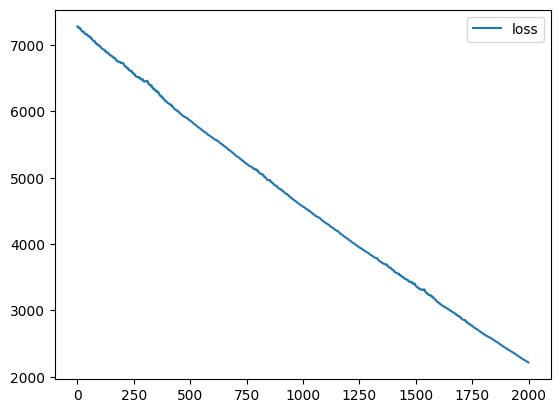

In [10]:
## Plot the loss
loss_df = pd.DataFrame(ai.history.history)
loss_df.plot()

In [11]:
## Evaluate the model
X_test1 = Scaler.transform(X_test)
ai.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 25ms/step - loss: 2361.9771


2361.97705078125

In [12]:
# Prediction
X_n1 = [[30]]
X_n1_1 = Scaler.transform(X_n1)
ai.predict(X_n1_1)

1/1 [==============================] - 0s 25ms/step


array([[300.85016]], dtype=float32)